# Importing Libraries
These are standard libraries we always import.

- 'pandas' is a generally usefeul library for Data Science and necessary to help read the dataset from the CSV file.

- 'numpy' is a generally useful library for Data Science and necessary to help with numerical operations with data.

- 'matplotlib' is a library helpful with visualizing data.

- 'seaborn' is a library helpful with visualizing data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In our EDA process, we will load the data from our CSV file into a dataframe, clean the data, visualize it, and determine the necessary 'features.'

In [ ]:
df = pd.read_csv('height_weight.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [ ]:
df['Height'].unique()

array([1.47, 1.5 , 1.52, 1.55, 1.57, 1.6 , 1.63, 1.65, 1.68, 1.7 , 1.73,
       1.75, 1.78, 1.8 , 1.83])

In [ ]:
df['Weight'].unique()

array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
       64.47, 66.28, 68.1 , 69.92, 72.19, 74.46])

In [ ]:
df.shape

(15, 2)

In [ ]:
df.isnull().sum()

,0
Height,0
Weight,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Height'].dtype

dtype('float64')

In [ ]:
df['Weight'].dtype

dtype('float64')

In [ ]:
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


Text(0.5, 1.0, 'Height (x) vs. Weight (y)')

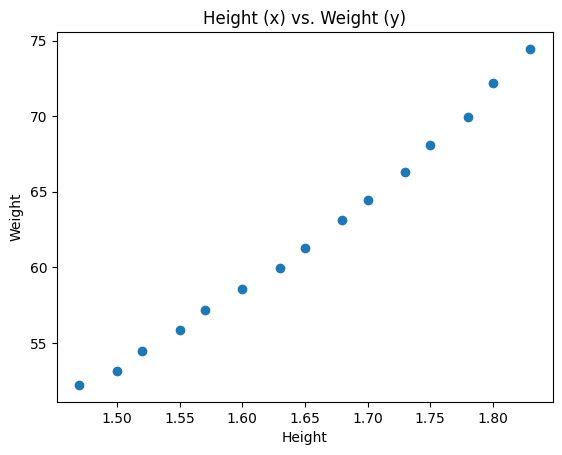

In [ ]:
X = df['Height']
y = df['Weight']

plt.scatter(X,y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height (x) vs. Weight (y)')

Text(0.5, 1.0, 'Weight (x) vs. Height (y)')

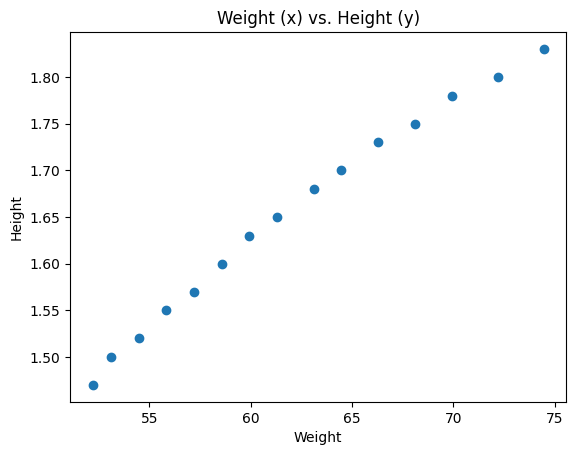

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight (x) vs. Height (y)')

# Preprocessing and Creating the Model
Now that we've performed the necessary EDA by understanding our data and visualizing our data to ensure it's in linear form, we may perform preprocessing and create the model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 32)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10,), (10,), (5,), (5,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.values.reshape(-1,1))

StandardScaler()

In [ ]:
X_train.values.reshape(-1,1)

array([[1.7 ],
       [1.5 ],
       [1.8 ],
       [1.83],
       [1.55],
       [1.68],
       [1.63],
       [1.6 ],
       [1.75],
       [1.65]])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [ ]:
print("Regresssion Coefficient:", model.coef_[0])
print("Regression Intercept:", model.intercept_)

Regresssion Coefficient: 64.8264561894295
Regression Intercept: -45.087355380157845


# Model Evaluation
We have understood our data by performing EDA and created our Linear Regression model using the sci-kit learn library. Now, we must test how our model performed.

In [ ]:
y_pred = model.predict(X_test.values.reshape(-1,1))

In [ ]:
for p, r in zip(y_pred, y_test):
    print("Real:", r, "\n" + "Predicted", p, "\n")

Real: 57.2 
Predicted 56.69018083724649 

Real: 69.92 
Predicted 70.30373663702667 

Real: 52.21 
Predicted 50.20753521830353 

Real: 66.28 
Predicted 67.0624138275552 

Real: 54.48 
Predicted 53.448858027775 



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

1.2184919503351097
0.9419152762513704
1.1038532286201412
0.9742758004061028
